# Introduction

Living cells use enzymes to catalyse reactions to create desired products. Many of these reactions can be connected together to create metabolic pathways. These pathways can be connected together to form a complex network of interactions called a *metabolism*. The metabolism is central to to all life on Earth and can switch between *purposes* creating a challenging data analysis/visualisation problem.

I have included 5 wild-type (e.g. default) simulations of the full metabolism of a small human pathogen, Mycoplasma genitalium. Each simualtion contains a timeseries for all of the 645 reactions. Where the value is the *flux* through the reaction at time, *t*. The flux of a reaction is related to the *speed* of the production/consumption of the molecules in the given reaction i.e. large flux means lots of reaction and zero flux means no reaction.

In order to avoid getting bogged down in biological details I have not included information on the reactions nor the matrix that describes what reactions feed what reactions. This information is available on request but I suggest we see if we can figure out the important relationships  from the data.

I have two, related, questions:
1. Is there a good general visualisation(s) to inspect this metabolic data?
2. Using the visualisation(s) from 1. (or some other visualisation(s)) can we see *phases* within the cell cycle i.e. are certain pathways activated at certain times in the cells life?

# Visualising metabolic reaction fluxs of a bacteria

Using a compuataional model of a whole cell I have extracted the metabolic reactions fluxs. In short metabolic reactions fluxs represent the changing of one molecule into another where a higher flux corresponds to a, proportionaly, faster reaction rate.

Each simulation is stochastic and so 5 examples of a wild-type (i.e. default) simulations are included for comaparison.

In [1]:
# set inline plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set path to the data
data_path = '/home/oli/Downloads/data_viz/example_WTs'

In [3]:
# load all examples
import pandas as pd
wt_metab = [pd.io.pickle.read_pickle(data_path + '/metabolic_reaction_fluxs_' + str(i + 1) + '.pickle') for i in range(5)]
len(wt_metab)

5

In [4]:
# look at a rough summary of the data.
wt_metab[0].describe()

,AHCYSs,Aas1,Aas2,Aas3,Aas4,Aas5,Aas6,Aas7,AceE,AckA,...,glycosyltransferase_PG160_DAG160,glycosyltransferase_PG161_DAG161,glycosyltransferase_PG181_DAG181,hydroxyl_radical_generation_1,hydroxyl_radical_generation_2,pSERpp,pTHRpp,pTYRpp,vinyl_chloride_activation_1,vinyl_chloride_activation_2
count,2.868700e+04,28687.0,28687.0,28687.0,28687.000000,28687.000000,28687.0,28687.000000,28687.000000,28687.000000,...,28687.000000,28687.000000,28687.000000,28687.0,28687.0,28687.000000,28687.000000,28687.000000,28687.0,28687.0
mean,6.008785e-01,0.0,0.0,0.0,5.988285,4.619267,0.0,3.123510,4157.718271,4157.591225,...,0.249090,0.191844,0.126917,0.0,0.0,0.030067,0.022839,0.019800,0.0,0.0
std,9.529509e-01,0.0,0.0,0.0,0.812916,0.627071,0.0,0.424020,1810.722701,1810.716227,...,0.033814,0.026043,0.017229,0.0,0.0,0.215759,0.263563,0.825725,0.0,0.0
min,0.000000e+00,0.0,0.0,0.0,4.511658,3.480220,0.0,2.353296,174.469691,174.345655,...,0.187668,0.144538,0.095621,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000e+00,0.0,0.0,0.0,5.285847,4.077418,0.0,2.757116,2768.904210,2768.773377,...,0.219871,0.169341,0.112030,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,3.811961e-27,0.0,0.0,0.0,5.873164,4.530464,0.0,3.063463,3692.988778,3692.880600,...,0.244301,0.188156,0.124478,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000e+00,0.0,0.0,0.0,6.807531,5.251220,0.0,3.550832,5249.975776,5249.866182,...,0.283167,0.218090,0.144281,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,8.000000e+00,0.0,0.0,0.0,7.207974,5.560115,0.0,3.759704,9555.736345,9555.585122,...,0.299824,0.230919,0.152768,0.0,0.0,20.526196,37.170539,138.000000,0.0,0.0


We can see that a some of the reactions might always be zero so lets look at what reactions are activate and whether the activate reactions are consistent across wildtype simulatons.

In [5]:
# lets take all the zero data out
non_activate_reactions_names = [wt_metab[i].columns[(wt_metab[i]!=0).all(axis=0)].tolist() for i in range(5)]
active_reactions = [wt_metab[i][wt_metab[i].columns[(wt_metab[i]!=0).all(axis=0)]] for i in range(5)]
print(wt_metab[0].shape)
for i in range(5):
    print(active_reactions[i].shape)
active_reactions[0].describe()

(28687, 645)
(28687, 196)
(29306, 197)
(32394, 193)
(33685, 197)
(32100, 192)


,Aas4,Aas5,Aas7,AceE,AckA,Adk1,Adk2,Adk3,Apt,Apts_Ala,...,Tkt1,Tkt2,Tmk,TpiA,TrxB,Udk1,Udk2,glycosyltransferase_PG160_DAG160,glycosyltransferase_PG161_DAG161,glycosyltransferase_PG181_DAG181
count,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,...,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000
mean,5.988285,4.619267,3.123510,4157.718271,4157.591225,28605.013009,24131.797937,-51828.827056,12.882895,13.949032,...,-7.823287,-7.823287,15.120121,2082.193832,127.895041,9.379323,15.560308,0.249090,0.191844,0.126917
std,0.812916,0.627071,0.424020,1810.722701,1810.716227,6852.588492,4324.556425,10580.033655,7.496460,1.893597,...,3.275635,3.275635,2.052573,915.355259,127.887134,1.307027,3.715898,0.033814,0.026043,0.017229
min,4.511658,3.480220,2.353296,174.469691,174.345655,22709.705896,12081.319782,-80611.860299,7.421116,10.509396,...,-19.817479,-19.817479,11.391710,-51.493975,5.284566,6.025015,10.022064,0.187668,0.144538,0.095621
25%,5.285847,4.077418,2.757116,2768.904210,2768.773377,23719.026158,21012.973092,-56189.086168,8.738473,12.312783,...,-8.986599,-8.986599,13.346501,1386.299623,8.036292,8.290146,12.321383,0.219871,0.169341,0.112030
50%,5.873164,4.530464,3.063463,3692.988778,3692.880600,25737.666682,23819.891102,-48968.267771,10.407127,13.680870,...,-6.786629,-6.786629,14.829446,1858.905208,150.056751,9.136079,15.122049,0.244301,0.188156,0.124478
75%,6.807531,5.251220,3.550832,5249.975776,5249.866182,30279.607861,26975.238704,-43766.784890,11.461013,15.857372,...,-5.571902,-5.571902,17.188676,2633.952038,197.076063,10.785649,18.088484,0.283167,0.218090,0.144281
max,7.207974,5.560115,3.759704,9555.736345,9555.585122,45419.411791,35725.938540,-33493.964138,41.476093,16.790159,...,-4.462803,-4.462803,18.199774,6395.331926,406.547950,11.420099,24.124666,0.299824,0.230919,0.152768


One can see that the activate reactions change even within wild-type simulations.

If we have information about reactions it will be interesting to look at what reactions are permenantly activate, permanently unactivate and transient.

In the menatime lets have a general look at how the first one behaves in general.

## Is the distribution stationary?

We can see that the first 9 reaction fluxes don't have stationary distributions. It also shows that it will be hard to check this for all the time series so lets see if we can look at it using summary statistics.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd196341c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd18664f5c0>]], dtype=object)

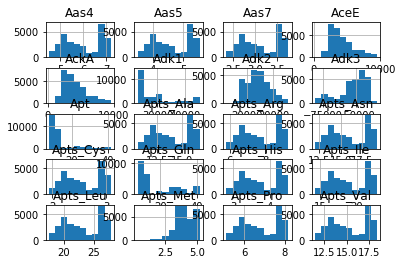

In [24]:
active_reactions[0].iloc[:, 0:20].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd195e0f240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd185d51d68>]], dtype=object)

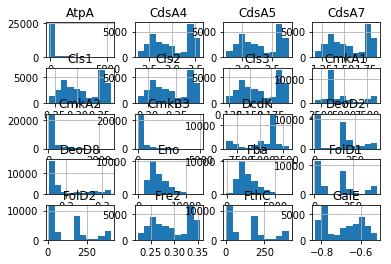

In [25]:
active_reactions[0].iloc[:, 20:40].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd198a7a240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd18545c748>]], dtype=object)

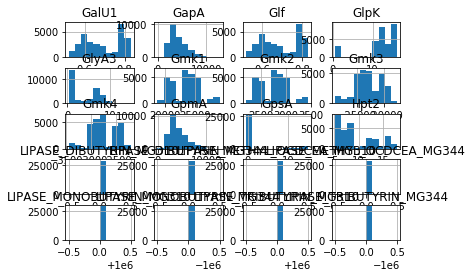

In [26]:
active_reactions[0].iloc[:, 40:60].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd193f39ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd184bc2a58>]], dtype=object)

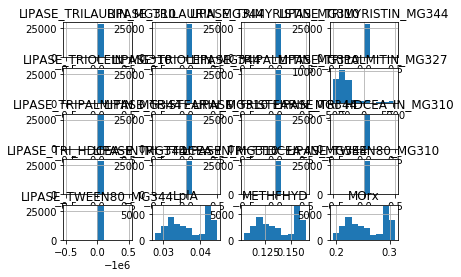

In [27]:
active_reactions[0].iloc[:, 60:80].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd191a1d208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd1842e2dd8>]], dtype=object)

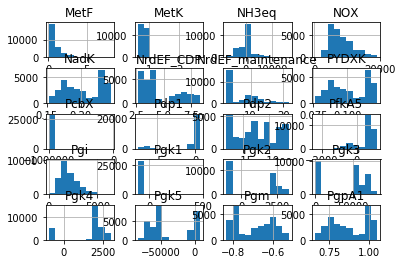

In [28]:
active_reactions[0].iloc[:, 80:100].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd196daaef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd1839dbd68>]], dtype=object)

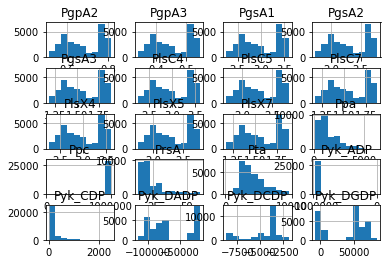

In [29]:
active_reactions[0].iloc[:, 100:120].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd196b31ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd1831afe80>]], dtype=object)

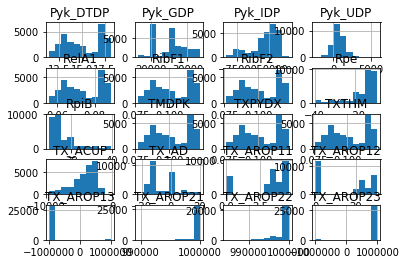

In [30]:
active_reactions[0].iloc[:, 120:140].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd193d62780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd1828b8278>]], dtype=object)

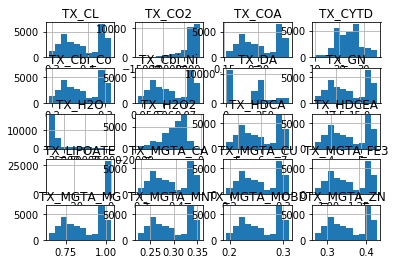

In [31]:
active_reactions[0].iloc[:, 140:160].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd199159208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd181fbb438>]], dtype=object)

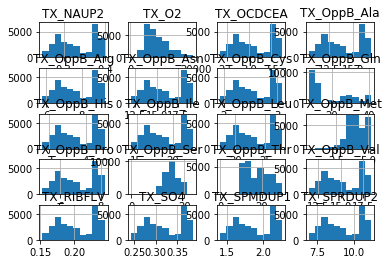

In [32]:
active_reactions[0].iloc[:, 160:180].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1856e50f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd1817e3898>]], dtype=object)

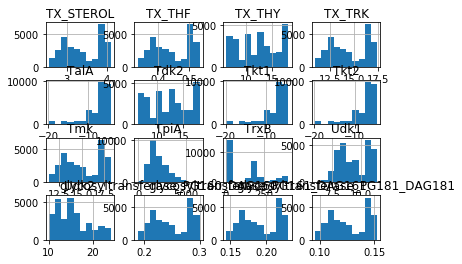

In [33]:
active_reactions[0].iloc[:, 180:200].hist()

We can see that not many (if any) have stationary distributions. Shall we just assume that none of them do?

Maybe we can group them into groups like, "bi-modal", "skewed", "Small bursts" and "random".

Things like bi-modal could be signs of changes in cell-cycle!

# # Correlation

In [6]:
# Take a look at a heatmap of the covariance matrix
corrs_1 = active_reactions[0].corr()

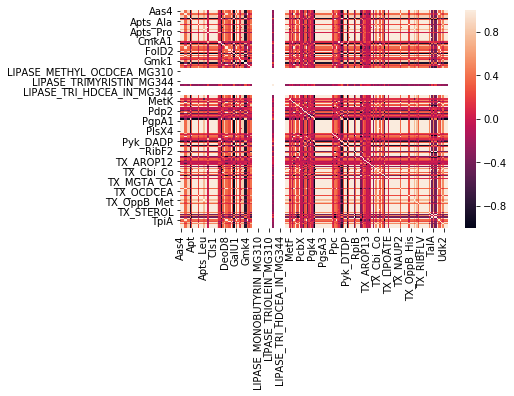

In [38]:
sns.heatmap(corrs_1, annot=False)

We can see that there are clear positively/negatively correlated reactions as well as non-correlated reactions. We should be careful here since things are non-stationary. Even so let's see if there's any clear groupings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd10978b0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd109355240>]], dtype=object)

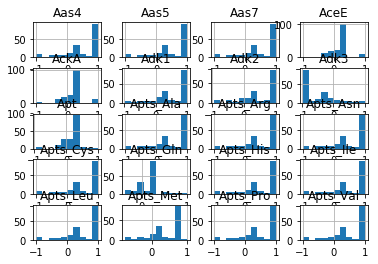

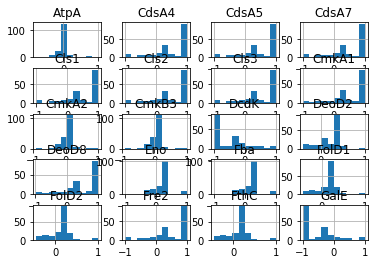

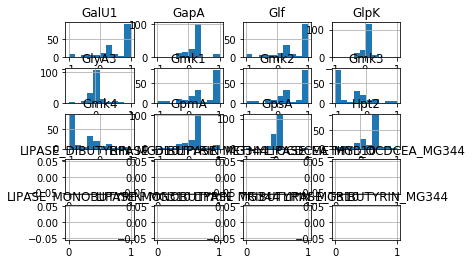

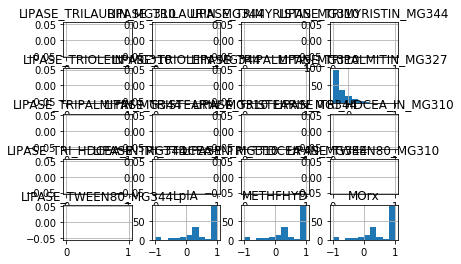

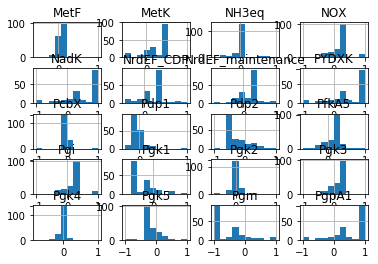

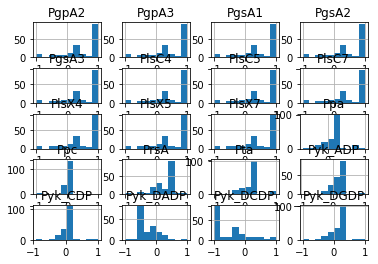

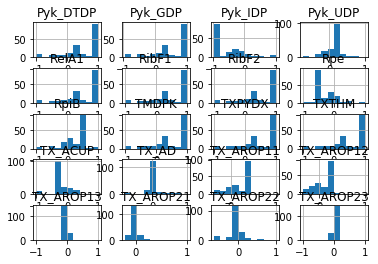

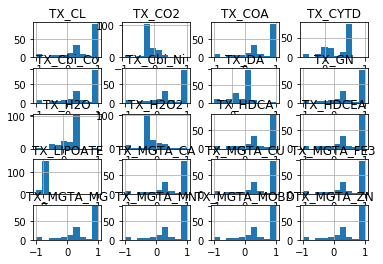

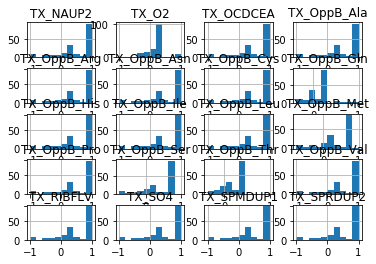

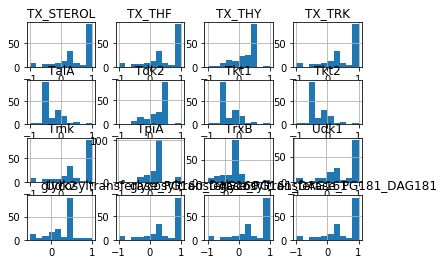

In [54]:
corrs_1[corrs_1.columns[:20]].hist()
corrs_1[corrs_1.columns[20:40]].hist()
corrs_1[corrs_1.columns[40:60]].hist()
corrs_1[corrs_1.columns[60:80]].hist()
corrs_1[corrs_1.columns[80:100]].hist()
corrs_1[corrs_1.columns[100:120]].hist()
corrs_1[corrs_1.columns[120:140]].hist()
corrs_1[corrs_1.columns[140:160]].hist()
corrs_1[corrs_1.columns[160:180]].hist()
corrs_1[corrs_1.columns[180:]].hist()

It seems like there are a few uncorrelated reactions and the rests are strongly correlated to others.

Perhaps we can group the strongly correlated ones and then have the ones left over as lone wolfs?

In [79]:
from scipy.cluster import hierarchy as hc
def plotDendogram(distance_matrix):
    dist_matrix_condensed = hc.distance.squareform(distance_matrix)
    z = hc.linkage(dist_matrix_condensed, method='average')
    dendrogram = hc.dendrogram(z)
    plt.show()

    return

# The distance matrix in the function above must be symetric however the covariance matrix is not. I feel like they either should be or at least a close approximation and so I will create a symetric version
def symetricTransform(matrix):
    new_matrix = np.triu(matrix) + np.triu(matrix).T
#    new_matrix = matrix
#    nrows, ncols = new_matrix.shape
#    for row in range(nrows):
#        for col in range(ncols):
#            new_matrix.iloc[row, col] = new_matrix.iloc[col,row]
            
    return new_matrix

In [65]:
plotDendogram(symetricTransform(corrs_1))

ValueError: Distance matrix 'X' must be symmetric.

In [8]:
import numpy as np
mat_test = np.matrix(corrs_1)
mat_test
new_test = np.triu(mat_test) + np.triu(mat_test).T
new_test.shape

NameError: name 'corrs_1' is not defined

I will come back to this later but will move on for now.

## Principle Component Analysis

In [9]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
active_1_std = StandardScaler().fit_transform(active_reactions[0])

In [10]:
# Create the covariance matrix
mean_vec = np.mean(active_1_std, axis=0)
cov_1_std = (active_1_std - mean_vec).T.dot((active_1_std - mean_vec)) / (active_1_std.shape[0]-1)
print(cov_1_std)

[[ 1.00003486  1.00003486  1.00003486 ...,  1.00003486  1.00003486
   1.00003486]
 [ 1.00003486  1.00003486  1.00003486 ...,  1.00003486  1.00003486
   1.00003486]
 [ 1.00003486  1.00003486  1.00003486 ...,  1.00003486  1.00003486
   1.00003486]
 ..., 
 [ 1.00003486  1.00003486  1.00003486 ...,  1.00003486  1.00003486
   1.00003486]
 [ 1.00003486  1.00003486  1.00003486 ...,  1.00003486  1.00003486
   1.00003486]
 [ 1.00003486  1.00003486  1.00003486 ...,  1.00003486  1.00003486
   1.00003486]]


In [11]:
# Get the eigenvalues and vectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_1_std)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.09810547+0.j -0.01344725+0.j -0.01195281+0.j ...,  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j]
 [-0.09810547+0.j -0.01344725+0.j -0.01195281+0.j ...,  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j]
 [-0.09810547+0.j -0.01344725+0.j -0.01195281+0.j ...,  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j]
 ..., 
 [-0.09810547+0.j -0.01344725+0.j -0.01195281+0.j ...,  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j]
 [-0.09810547+0.j -0.01344725+0.j -0.01195281+0.j ...,  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j]
 [-0.09810547+0.j -0.01344725+0.j -0.01195281+0.j ...,  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j]]

Eigenvalues 
[  1.03173748e+02 +0.00000000e+00j   1.33780560e+01 +0.00000000e+00j
   1.16671329e+01 +0.00000000e+00j   6.65355639e+00 +0.00000000e+00j
   5.52481652e+00 +0.00000000e+00j   3.43938821e+00 +0.00000000e+00j
   3.56733426e+00 +0.00000000e+00j   3.00213575e+00 +0.00000000e+00j
   2.23264060e+00 +0.00000000e+00j   2.14694929e+00 

In [19]:
# Organise in descending order
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
#eig_pairs.sort()
#eig_pairs.reverse()
from operator import itemgetter
sorted(eig_pairs,key=itemgetter(0))

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
103.173748105
13.3780560461
11.6671329315
6.65355639009
5.52481651797
3.43938821314
3.56733425626
3.00213575211
2.23264059919
2.14694928644
1.95871382241
1.74905728182
1.35165030822
1.56585204998
1.51693824355
1.10298964639
0.999424916713
0.963205817342
0.853243848729
0.673380329495
0.65651008171
0.584766653941
0.526507044969
0.468226823579
0.420487113186
0.331861548101
0.299664894993
0.235718761261
0.158152155018
0.168547165167
0.111845243875
0.108021797274
0.0899609430895
0.0807496659715
0.0611566739064
0.0569248728513
0.0497473943862
0.0277942680024
0.0271918205822
0.0135409080159
0.00356247634614
0.00128773916031
0.000980771588955
0.00089668927387
0.000659397518208
0.000597195582457
0.000292359528264
5.31363843865e-05
4.74292004483e-05
2.81345482777e-05
3.88089692197e-07
4.69568428174e-08
3.01734191685e-14
9.11560515367e-15
2.91626212158e-15
2.06014746213e-15
2.06014746213e-15
2.43531223235e-15
1.98318628224e-15
1.98318628224e-15
2.23151849474e-15
2

In [20]:
# There seems to be a few obvious combinations here but to be thorough I'll look at the explained variance
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
# eigen values causing errors I think becaus ethey're complex so lets take the real part (perhaps magnitude makes more sense??)
re_ev = [val.real for val in eig_vals]
tot = sum(re_ev)
var_exp = [(i / tot)*100 for i in sorted(re_ev, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

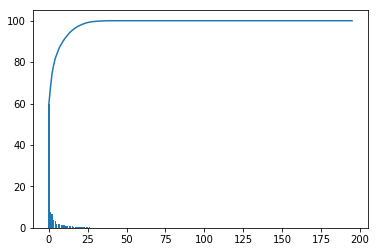

In [21]:
# This is my hacked fix of the above
# First show the bar chart
x_bar=['PC %s' %i for i in range(1,len(var_exp) + 1)]
y_bar=var_exp
y_pos = np.arange(len(x_bar))
plt.bar(y_pos, y_bar)
# Now show the cumalitve variance
y_cum=cum_var_exp
plt.plot(y_pos, y_cum)

So we can see that almost all the variance is explained in the top 25-ish components.

Another idea would be to tae all eigenvalues greater than one (16).

Also the top 3 or the top 5 might be useful.

I suggest we start by planing it safe with the 25-ish. Also we should seee if any of these groups make biologically meaningful groups.

In [28]:
eig_pairs[0][1].reshape(196,1)

array([[-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.04194541+0.j],
       [-0.04194463+0.j],
       [-0.08483866+0.j],
       [-0.08625170+0.j],
       [ 0.08883614+0.j],
       [-0.03292447+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.02543136+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.07464037+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.00187281+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.09810547+0.j],
       [-0.08571495+0.j],
       [-0.01095639+0.j],
       [-0.00912704+0.j],
       [ 0.08571720+0.j],
       [-0.03451238+0.j],
       [-0.08122739+0.j],
       [-0.04161559+0.j],
       [-0.04172575+0.j],
       [-0.02973709+0.j],
       [-0.02972431+0.j],
       [-0.09810547+0.j],
       [-0.0

In [29]:
# TOP 3
# Create the projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(196,1),
                      eig_pairs[1][1].reshape(196,1),
                      eig_pairs[2][1].reshape(196,1)))

(28687, 3)


/home/oli/virtualenvs/standard_python3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



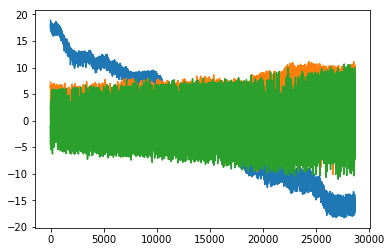

In [33]:
# Create projection onto 3D
Y = active_1_std.dot(matrix_w)
print(Y.shape)
plt.plot(Y)

/home/oli/virtualenvs/standard_python3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



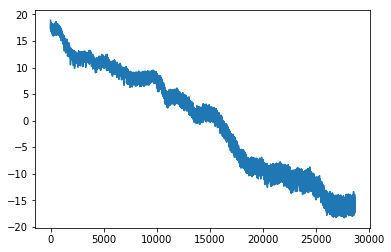

In [42]:
# Look at each individually
plt.plot(Y[:,0])

/home/oli/virtualenvs/standard_python3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



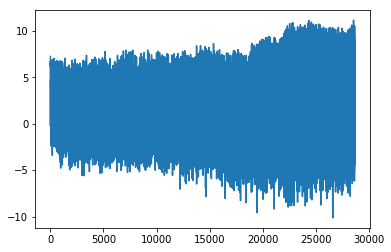

In [43]:
plt.plot(Y[:,1])

/home/oli/virtualenvs/standard_python3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



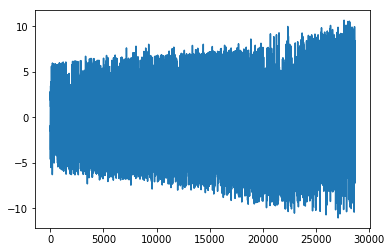

In [44]:
plt.plot(Y[:,2])